In [40]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore", "Mean of empty slice")
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [0]:
#==================#
# Données généréés #
#==================#
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [0]:
#################
# A) K-Moyennes #
#################

#---------------------------------------------------------------------------------#
## 1- Écrivez en python l’algorithme des K-Moyennes sous la forme d’une fonction ##
#---------------------------------------------------------------------------------#

def K_means(X,k):
  n = X.shape[0]
  m=0
  c = X.shape[1]
  mean = np.mean(X, axis = 0)
  std = np.std(X, axis = 0)
  centre = np.random.randn(k,c)*std + mean
  centre_old = np.zeros(centre.shape) 
  centre_new = np.copy(centre)
  clusters = np.zeros(n)
  distances = np.zeros((n,k))
  error = np.linalg.norm(centre_new - centre_old)
  while error !=0 and m != 120:
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centre[i], axis=1)
        clusters = np.argmin(distances, axis = 1)
        centre_old = np.copy(centre_new)
        for i in range(k):
            centre_new[i] = np.mean(X[clusters == i], axis=0)
        error = np.linalg.norm(centre_new - centre_old)
        m = m+1 
  return clusters, centre_new

def afficher_Kmeans(X,c):
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(c[:,0], c[:,1], s=300, c='red')
    plt.show()

In [0]:
#---------------------------------------------#
# Comparez avec la fonction Kmeans de sklearn #
#---------------------------------------------#
def Kmeans(X,k):
  kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=len(X), n_init=10, random_state=0)
  kmeans = kmeans.fit(X)
  pred_y = kmeans.predict(X)
  plt.scatter(X[:,0], X[:,1])
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c='red')
  plt.show()

Mon Kmeans


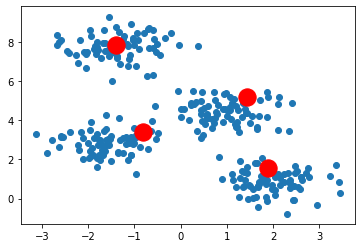

In [44]:
print("Mon Kmeans")
c,nc = K_means(X,4)
afficher_Kmeans(X,nc)

Sklearn Kmeans


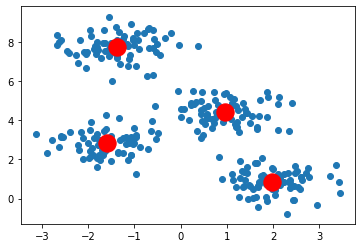

In [45]:
print("Sklearn Kmeans")
Kmeans(X,4)

Test n° 1


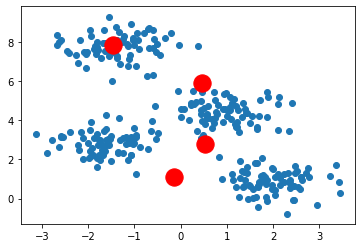

Test n° 2


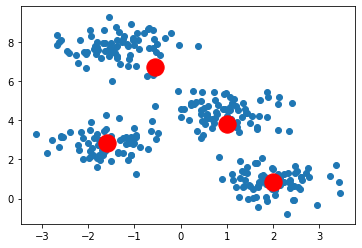

Test n° 3


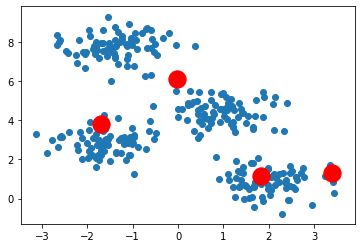

Test n° 4


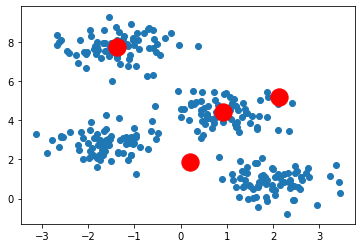

In [46]:
#--------------------------------------------------------#
## 2. Expérimenter l’instabilité due à l’initialisation ##
#--------------------------------------------------------#
def instabilite(X,k,n):
  for i in range(n):
    c,nc = K_means(X,k)
    print("Test n°",i+1)
    afficher_Kmeans(X,nc)

instabilite(X,4,4)

Meilleur indice de Silhoutte est :  0.6186389445701693


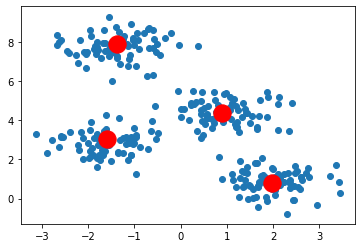

In [47]:
#--------------------------------------#
## 3. Utiliser l’indice de Silhouette ##
#--------------------------------------#

def Silhouette(X,clusters):
  return metrics.silhouette_score(X, clusters, metric='euclidean')   
    
def protocole(X):
    score = 0
    for i in range(2,10):
        for j in range(10):
            c,nc = K_means(X,i)
            b=Silhouette(X,c)
            if score < b:
                score = b
                centre_new = nc 
    print("Meilleur indice de Silhoutte est : ",score)   
    afficher_Kmeans(X,centre_new)

protocole(X)

In [48]:
#-----------------------#
## 4. Utiliser une ACP ##
#-----------------------#
PCA = PCA(n_components=2).fit(X).transform(X)
print('PCA (10 premières lignes):\n',PCA[:10])
#-----------------------#
## 4. Utiliser une LDA ##
#-----------------------#
LDA = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)
print('LDA (10 premières lignes):\n',LDA[:10])

PCA (10 premières lignes):
 [[-2.01616694 -0.01679795]
 [ 3.71613677 -0.13003844]
 [ 0.55503775 -1.52383607]
 [ 3.9234751  -0.6566597 ]
 [-2.41689163 -0.31285899]
 [-4.79345065 -1.61841309]
 [-1.421835    2.61647075]
 [-0.2061925  -1.46454628]
 [ 4.15211641 -1.65200822]
 [ 4.56816034 -1.28424075]]
LDA (10 premières lignes):
 [[-3.38223087  0.04572696]
 [ 6.24076844  0.18367997]
 [ 0.99513795  2.53132643]
 [ 6.61072394  1.05834219]
 [-4.04220558  0.54201203]
 [-7.97515004  2.73587476]
 [-2.49531416 -4.34222911]
 [-0.28461715  2.43935557]
 [ 7.03606014  2.7129495 ]
 [ 7.71873507  2.0971838 ]]


In [49]:
###########################################
# B) Analyse des données « choix projet » #
###########################################

#------------------------------#
## Importation de fichier csv ##
#------------------------------#

CP = pd.read_csv("choixprojetstab.csv" , sep=';') 
C = np.array(CP['étudiant·e'])
M = np.array(CP.drop(['étudiant·e'], axis=1))

print('Code étudiant·e :\n',C,'\n')
print('Data :\n',M,'\n')
print('Test bien numerique : M[0,0]+M[0,0] = ', M[0,0] + M[0,0])

Code étudiant·e :
 ['bl/.vSDYCGrSs' 'bl/1NiMubceBs' 'bl/dvgMTLVSvk' 'bl1NWhKcNADF2'
 'bl1ao5B7htJfQ' 'bl1u./AF8TEp6' 'bl2LwDaKpKT/c' 'bl2jhb3v2qUhc'
 'bl2rqWgKava4o' 'bl4wbw9k3zw/c' 'bl5.Z2M26c/5o' 'bl5/1tjKhKrAE'
 'bl55W0uSMrpz6' 'bl65TErI.VjAA' 'bl9BdxOPgV0XU' 'bl9HR9LuSmrMo'
 'blA5K4GlKIEN2' 'blB6OJg1ilNV2' 'blC888Fel.osw' 'blDPCjzWCczr6'
 'blFD1aQDfmpH.' 'blFq6YzuUpuG6' 'blGDihFnA6.LE' 'blHIVuF4ftibA'
 'blHxzJKy1kWeU' 'blIf9FrZBwJyk' 'blK.9jBCD/SSw' 'blKXgoRO0CXOE'
 'blKsQZNr3tnvw' 'blMKFlGVYbnSA' 'blNDVy9IQ.pyc' 'blQdUJch/nfDg'
 'blSI8b6JyYqHY' 'blUiqJyD6t5eo' 'blXfmkaW817T6' 'blXtkgxAdNzb.'
 'blYb2ABO7EU.M' 'blZxs/nnNLCos' 'blZzwRPNDZpRY' 'blaADEMnN043A'
 'blaIQ61DLW6uc' 'blbKjW2k4.8xo' 'blbfVllTjpkQY' 'blbkl9iy6NSzQ'
 'blddve1gjnw96' 'blfIGd5mN48z2' 'blg1OtiwNMDAs' 'blg8PMUnKJxes'
 'blginkLBh0Sf.' 'blh9lEioXhmgc' 'blhai4aeyq8rU' 'blhnNMwGPnuNc'
 'bliYbAmgGkzSI' 'bljdvFfVzFYBk' 'bllOE3T7MU9nE' 'blleUFdn4IybY'
 'blmLNmnzoOUT6' 'bln85uWpKDNjM' 'blnahdfBfYOd.' 'blpJfyKbetUsc'
 'blpP

In [0]:
#-------------------------------------------------------------------------#
##  Testez les différents algorithmes du package et proposez le meilleur ##
## ----- clustering possible des données selon l’indice Silhouette ----- ##
#-------------------------------------------------------------------------#

def protocole2(X,Y,f):
  range_n_clusters = [2, 3, 4, 5, 6]
  for n_clusters in range_n_clusters:
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(12, 4)
      ax1.set_xlim([-0.1, 1])
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
      if f=='K':
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
      if f=='A':
        clusterer =  AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(X)
        cluster_labels = clusterer.labels_
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("Pour n_clusters =", n_clusters,
            "La moyenne silhouette_score est :", silhouette_avg)
      sample_silhouette_values = silhouette_samples(X, cluster_labels)
      y_lower = 10

      for i in range(n_clusters):
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
          y_lower = y_upper + 10
      ax1.set_title("La silhouette pour les différents clusters")
      ax1.set_xlabel("Les valeurs du coefficient de silhouette")
      ax1.set_ylabel("Étiquette de cluster")
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
      ax1.set_yticks([]) 
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')
      if f == 'K':
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        ax2.set_title("La visualisation des données en cluster.")
        ax2.set_xlabel("Espace pour la 1ère caracteristique")
        ax2.set_ylabel("Espace pour la 2nd caracteristique")
      if f == 'K':
        plt.suptitle(("Analyse de silhouette pour le regroupement de KMeans sur des exemples de données "
                      "avec n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')
      if f == 'A':
        plt.suptitle(("Analyse des silhouettes pour le regroupement WARD sur des exemples de données "
                    "avec n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')
  plt.show()

Pour n_clusters = 2 La moyenne silhouette_score est : 0.2537954711744975
Pour n_clusters = 3 La moyenne silhouette_score est : 0.27395879223997877
Pour n_clusters = 4 La moyenne silhouette_score est : 0.26800412978792404
Pour n_clusters = 5 La moyenne silhouette_score est : 0.3176827275171515
Pour n_clusters = 6 La moyenne silhouette_score est : 0.336781722416005


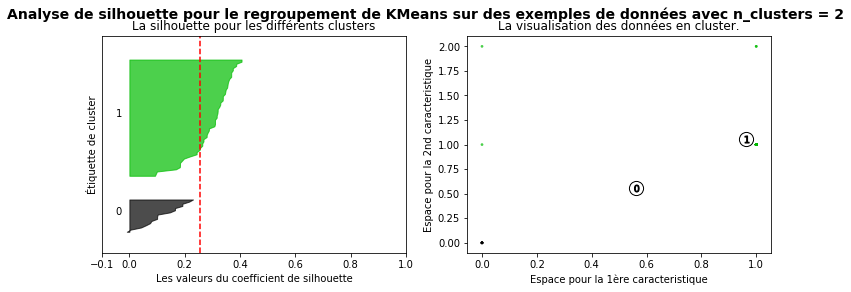

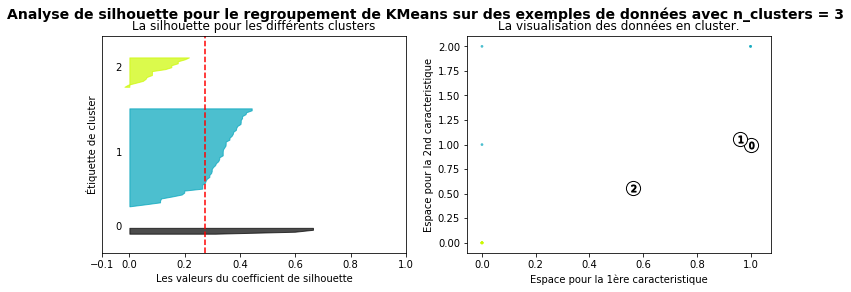

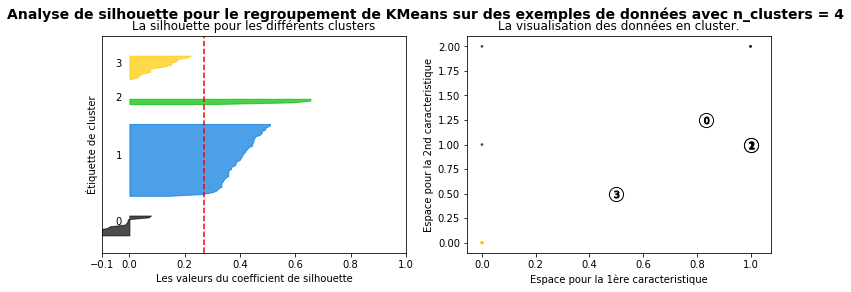

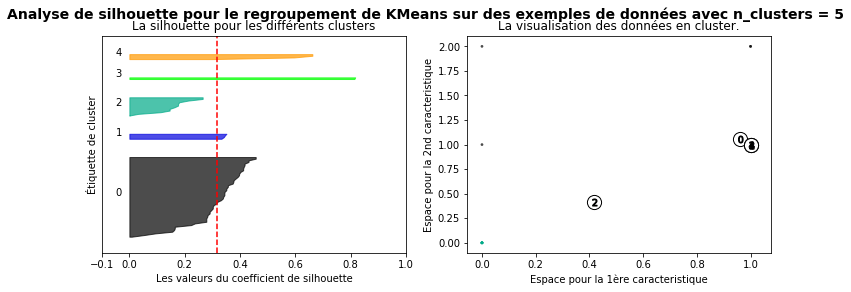

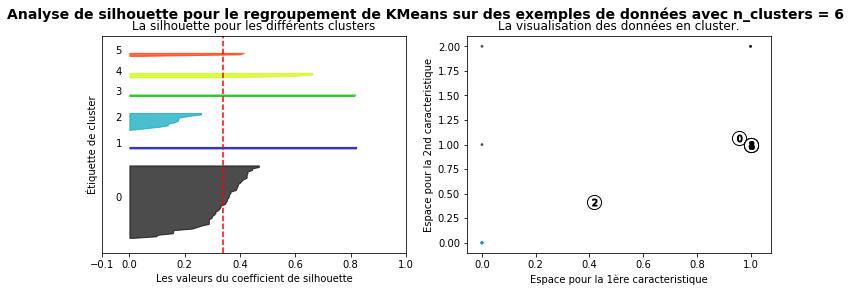

In [54]:
protocole2(M,C,'K')

Pour n_clusters = 2 La moyenne silhouette_score est : 0.25270656690459653
Pour n_clusters = 3 La moyenne silhouette_score est : 0.25719312860651694
Pour n_clusters = 4 La moyenne silhouette_score est : 0.2884593801353125
Pour n_clusters = 5 La moyenne silhouette_score est : 0.302588527642423
Pour n_clusters = 6 La moyenne silhouette_score est : 0.3253001235762009


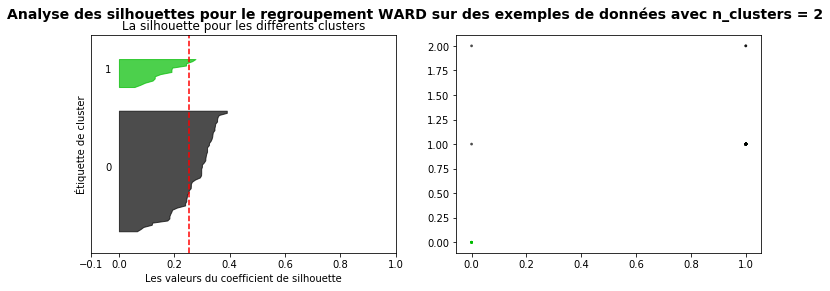

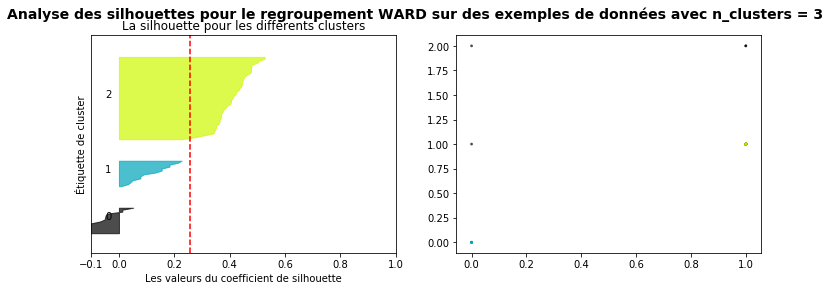

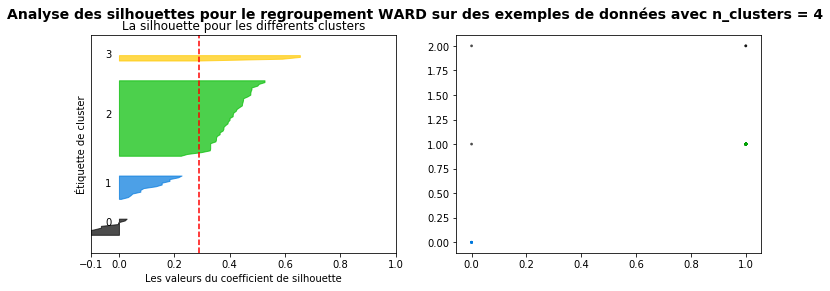

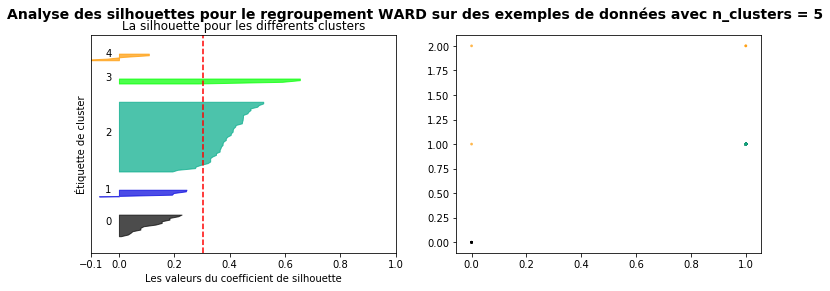

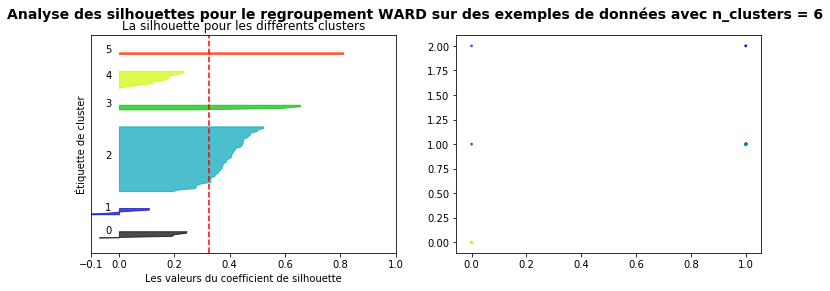

In [55]:
protocole2(M,C,'A')